In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install umap-learn==0.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 956.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82686 sha256=b3315eabfce2f33f1c92078418e6c550fc692ad1204f7af14d2802df0c7ff68e
  Stored in directory: /root/.cache/pip/wheels/ff/50/f5/c6dc74059096b9bd10a4446d33ad53748c67850e5c73eb85bd
Successfully built umap-learn


In [ ]:
import pandas as pd
import pickle as pk
import umap

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
EMBEDDING_PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/embeddings/'
PCA_PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/FeatureSelection/PCA/'
UMAP_PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/FeatureSelection/UMAP/'
SVD_PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/FeatureSelection/SVD/'
AE_PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/FeatureSelection/AE/'

In [ ]:
bert_embeddings = pd.read_csv(EMBEDDING_PATH+'bert_embeddings.csv')
labse_embeddings = pd.read_csv(EMBEDDING_PATH+'labse_embeddings.csv')
w2v_embeddings = pd.read_csv(EMBEDDING_PATH+'w2v_embeddings.csv')

# PCA

In [ ]:
bert_pca = PCA()
labse_pca = PCA()
w2v_pca = PCA()

In [ ]:
%%timeit
bert_pca.fit(bert_embeddings)

7.28 s ± 1.69 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


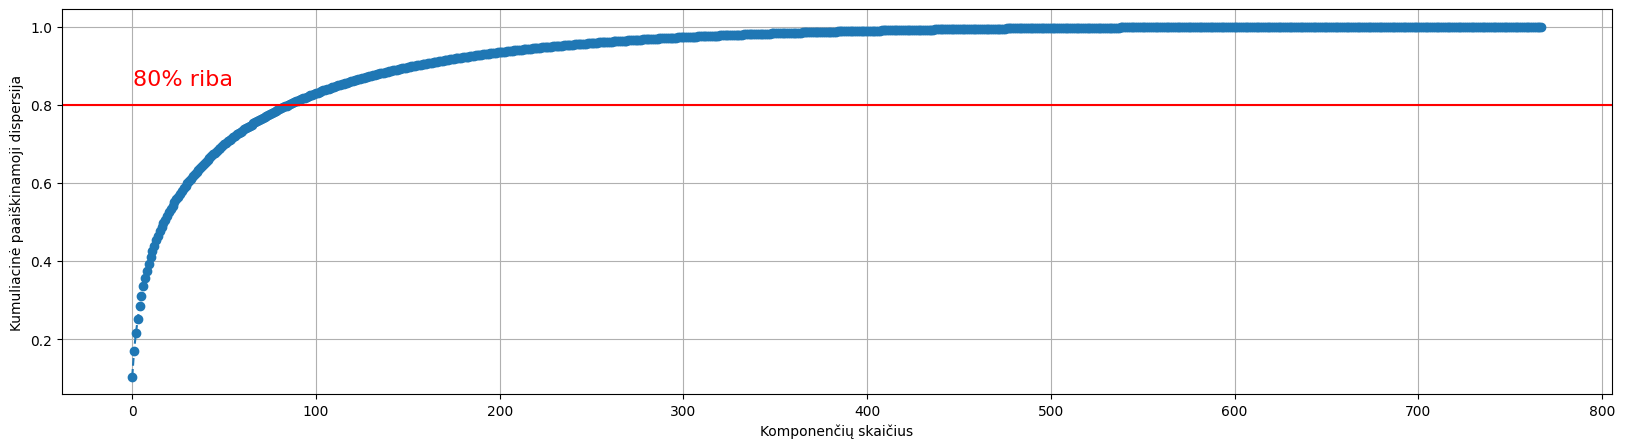

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(bert_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Komponenčių skaičius')
plt.ylabel('Kumuliacinė paaiškinamoji dispersija')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% riba', color = 'red', fontsize=16)

plt.grid()
plt.show()

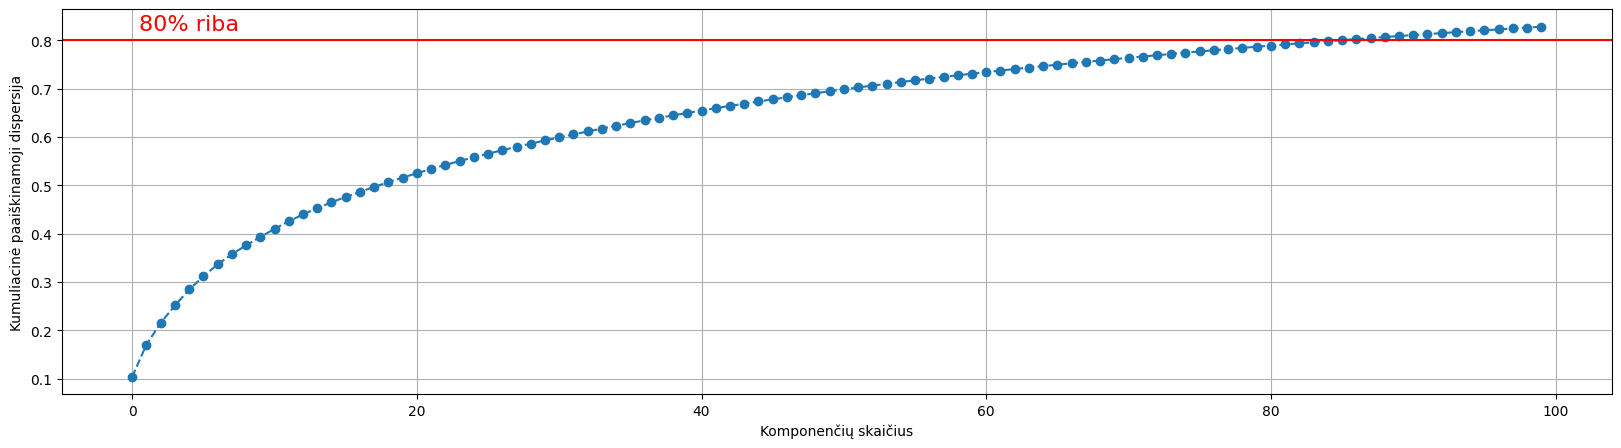

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(bert_pca.explained_variance_ratio_[:100].cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Komponenčių skaičius')
plt.ylabel('Kumuliacinė paaiškinamoji dispersija')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.82, '80% riba', color = 'red', fontsize=16)

plt.grid()
plt.show()

In [ ]:
bert_pca = PCA(n_components=86)
bert_result = bert_pca.fit_transform(bert_embeddings)
pk.dump(bert_pca, open(PCA_PATH+"bert_pca.pkl","wb"))

In [ ]:
PCA_COLUMNS = [f'PCA_{i+1}' for i in range(0,86)]
bert_pca_df = pd.DataFrame(data = bert_result, columns = PCA_COLUMNS)
bert_pca_df.to_csv(PCA_PATH+'bert_pca_embeddings.csv', index=False)

In [ ]:
%%timeit
labse_pca.fit(labse_embeddings)

8.63 s ± 2.22 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


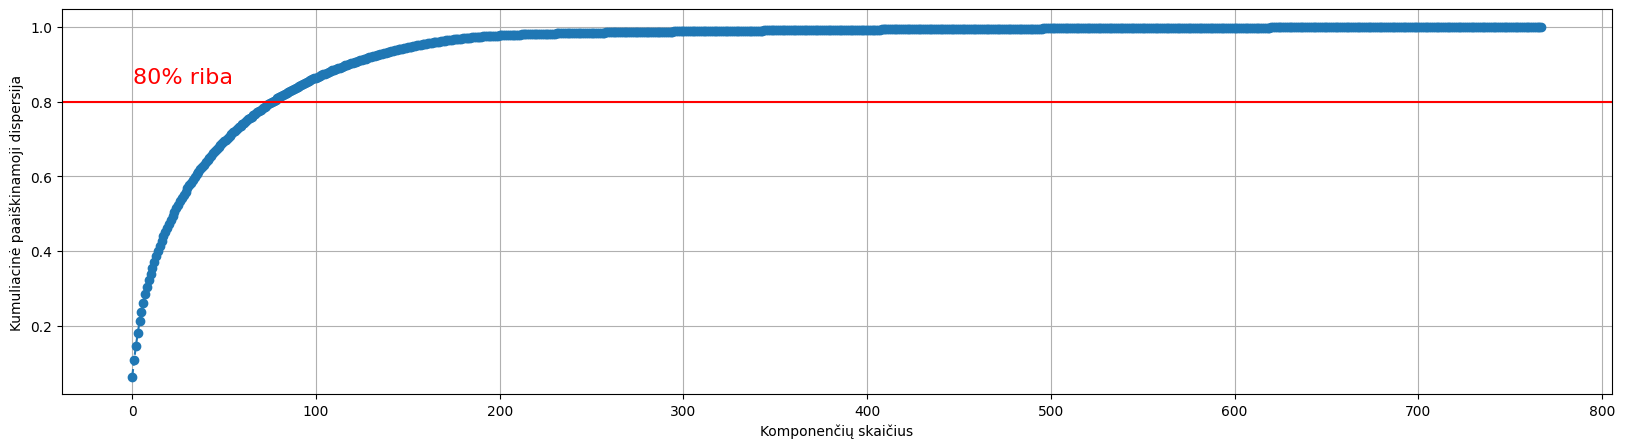

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(labse_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Komponenčių skaičius')
plt.ylabel('Kumuliacinė paaiškinamoji dispersija')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% riba', color = 'red', fontsize=16)

plt.grid()
plt.show()

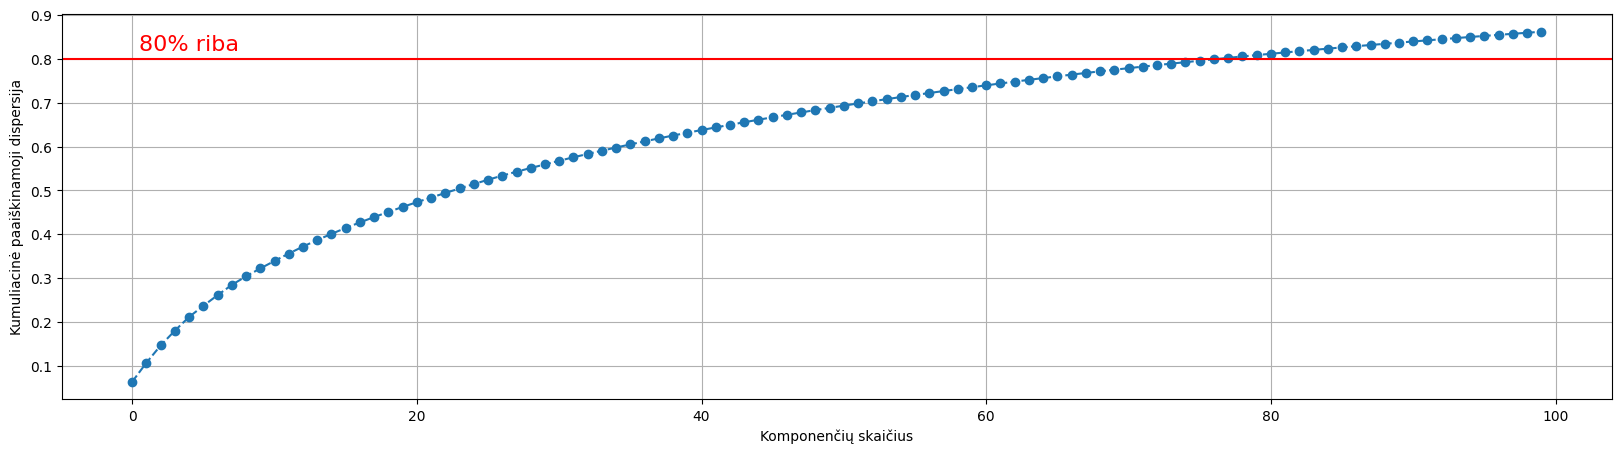

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(labse_pca.explained_variance_ratio_[:100].cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Komponenčių skaičius')
plt.ylabel('Kumuliacinė paaiškinamoji dispersija')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.82, '80% riba', color = 'red', fontsize=16)

plt.grid()
plt.show()

In [ ]:
labse_pca = PCA(n_components=77)
labse_result = labse_pca.fit_transform(labse_embeddings)
pk.dump(labse_pca, open(PCA_PATH+"labse_pca.pkl","wb"))

In [ ]:
PCA_COLUMNS = [f'PCA_{i+1}' for i in range(0,77)]
labse_pca_df = pd.DataFrame(data = labse_result, columns = PCA_COLUMNS)
labse_pca_df.to_csv(PCA_PATH+'labse_pca_embeddings.csv', index=False)

In [ ]:
%%timeit
w2v_pca.fit(w2v_embeddings)

The slowest run took 4.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1.81 s ± 1.46 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


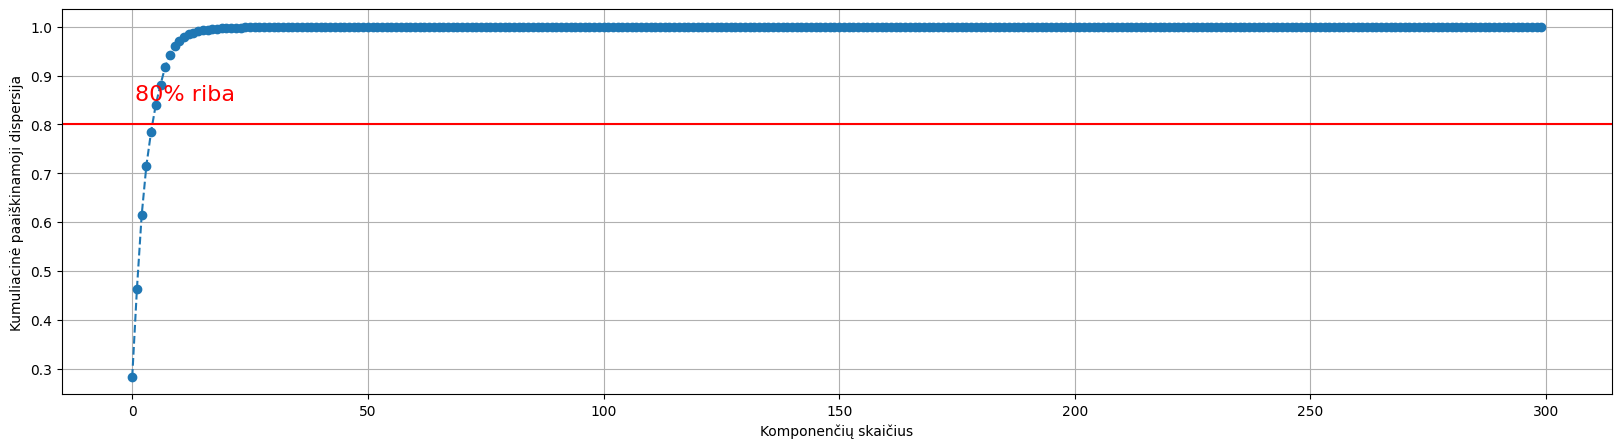

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(w2v_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Komponenčių skaičius')
plt.ylabel('Kumuliacinė paaiškinamoji dispersija')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% riba', color = 'red', fontsize=16)

plt.grid()
plt.show()

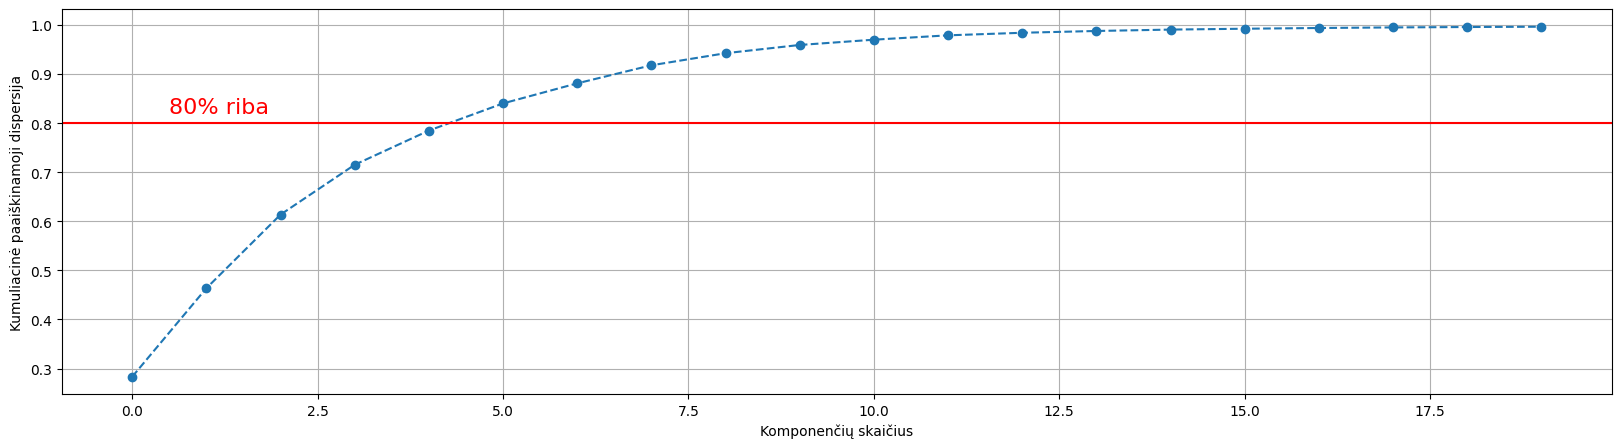

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(w2v_pca.explained_variance_ratio_[:20].cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Komponenčių skaičius')
plt.ylabel('Kumuliacinė paaiškinamoji dispersija')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.82, '80% riba', color = 'red', fontsize=16)

plt.grid()
plt.show()

In [ ]:
w2v_pca = PCA(n_components=5, whiten=True)
w2v_result = w2v_pca.fit_transform(w2v_embeddings)
pk.dump(w2v_pca, open(PCA_PATH+"w2v_pca.pkl","wb"))

In [ ]:
PCA_COLUMNS = [f'PCA_{i+1}' for i in range(0,5)]
w2v_pca_df = pd.DataFrame(data = w2v_result, columns = PCA_COLUMNS)
w2v_pca_df.to_csv(PCA_PATH+'w2v_pca_embeddings.csv', index=False)

# UMAP

In [ ]:
UMAP_COLUMNS = [f'UMAP_{i+1}' for i in range(0,50)]

In [ ]:
bert_umap = umap.UMAP(n_components=50, random_state=42)
bert_umap_res = bert_umap.fit_transform(bert_embeddings)

In [ ]:
pk.dump(bert_umap, open(UMAP_PATH+"bert_umap.pkl","wb"))

In [ ]:
bert_umap_df = pd.DataFrame(data = bert_umap_res, columns = UMAP_COLUMNS)
bert_umap_df.to_csv(UMAP_PATH+'bert_umap_embeddings.csv', index=False)

In [ ]:
labse_umap = umap.UMAP(n_components=50, random_state=42)
labse_umap_res = labse_umap.fit_transform(labse_embeddings)
pk.dump(labse_umap, open(UMAP_PATH+"labse_umap.pkl","wb"))

In [ ]:
labse_umap_df = pd.DataFrame(data = labse_umap_res, columns = UMAP_COLUMNS)
labse_umap_df.to_csv(UMAP_PATH+'labse_umap_embeddings.csv', index=False)

In [ ]:
w2v_umap = umap.UMAP(n_components=50, random_state=42)
w2v_umap_res = w2v_umap.fit_transform(w2v_embeddings)
pk.dump(w2v_umap, open(UMAP_PATH+"w2v_umap.pkl","wb"))

In [ ]:
w2v_umap_df = pd.DataFrame(data = w2v_umap_res, columns = UMAP_COLUMNS)
w2v_umap_df.to_csv(UMAP_PATH+'w2v_umap_embeddings.csv', index=False)

# SVD

In [ ]:
bert_svd = TruncatedSVD(n_components=90)
bert_svd.fit(bert_embeddings)
bert_result = bert_svd.transform(bert_embeddings)
pk.dump(bert_svd, open(SVD_PATH+"bert_svd.pkl","wb"))

SVD_COLUMNS = [f'SVD_{i+1}' for i in range(0,90)]
bert_svd_df = pd.DataFrame(data = bert_result, columns = SVD_COLUMNS)
bert_svd_df.to_csv(SVD_PATH+'bert_svd_embeddings.csv', index=False)

In [ ]:
labse_svd = TruncatedSVD(n_components=80)
labse_svd.fit(labse_embeddings)
labse_result = labse_svd.transform(labse_embeddings)
pk.dump(labse_svd, open(SVD_PATH+"labse_svd.pkl","wb"))

SVD_COLUMNS = [f'SVD_{i+1}' for i in range(0,80)]
labse_svd_df = pd.DataFrame(data = labse_result, columns = SVD_COLUMNS)
labse_svd_df.to_csv(SVD_PATH+'labse_svd_embeddings.csv', index=False)

In [ ]:
w2v_svd = TruncatedSVD(n_components=6)
w2v_svd.fit(w2v_embeddings)
w2v_result = w2v_svd.transform(w2v_embeddings)
pk.dump(w2v_svd, open(SVD_PATH+"w2v_svd.pkl","wb"))

SVD_COLUMNS = [f'SVD_{i+1}' for i in range(0,6)]
w2v_svd_df = pd.DataFrame(data = w2v_result, columns = SVD_COLUMNS)
w2v_svd_df.to_csv(SVD_PATH+'w2v_svd_embeddings.csv', index=False)

# AE

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
AE_COLUMNS = [f'AE_{i+1}' for i in range(0,64)]

In [ ]:
input_dim = bert_embeddings.shape[1]
encoding_dim = 64

# Encoder Part
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
encoder_out = tf.keras.layers.Dense(encoding_dim, activation='relu')(x)

encoder = tf.keras.Model(input_layer, encoder_out, name='encoder')

# Decoder Part
decoder_input = tf.keras.layers.Dense(128, activation='relu')(encoder_out)
x = tf.keras.layers.Dense(256, activation='relu')(decoder_input)
x = tf.keras.layers.Dense(512, activation='relu')(x)
decoder_out = tf.keras.layers.Dense(input_dim)(x)

autoencoder = tf.keras.Model(input_layer, decoder_out, name='autoencoder')

autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 768)                 │         393,984 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,133,120 (4.32 MB)

 Trainable params: 1,133,120 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

bert_history = autoencoder.fit(
    bert_embeddings.to_numpy(), bert_embeddings.to_numpy(),
    epochs=1000,
    batch_size=128,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 0.0077 - val_loss: 0.0039
Epoch 2/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 3/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 6/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 7/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 9/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 10/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 11/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 12/1000
1

In [ ]:
with open(AE_PATH+'bert_history', 'wb') as file_pi:
    pk.dump(bert_history.history, file_pi)

In [ ]:
autoencoder.save(AE_PATH+'bert_autoencoder.keras')

In [ ]:
bert_AE_result = encoder.predict(bert_embeddings.to_numpy())

876/876 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [ ]:
bert_ae_df = pd.DataFrame(data = bert_AE_result, columns = AE_COLUMNS)
bert_ae_df.to_csv(AE_PATH+'bert_ae_embeddings.csv', index=False)

In [ ]:
input_dim = labse_embeddings.shape[1]
encoding_dim = 64

# Encoder Part
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
encoder_out = tf.keras.layers.Dense(encoding_dim, activation='relu')(x)

encoder = tf.keras.Model(input_layer, encoder_out, name='encoder')

# Decoder Part
decoder_input = tf.keras.layers.Dense(128, activation='relu')(encoder_out)
x = tf.keras.layers.Dense(256, activation='relu')(decoder_input)
x = tf.keras.layers.Dense(512, activation='relu')(x)
decoder_out = tf.keras.layers.Dense(input_dim)(x)

autoencoder = tf.keras.Model(input_layer, decoder_out, name='autoencoder')

autoencoder.compile(optimizer='adam', loss='mse')

labse_history = autoencoder.fit(
    labse_embeddings.to_numpy(), labse_embeddings.to_numpy(),
    epochs=1000,
    batch_size=128,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping]
)

with open(AE_PATH+'labse_history', 'wb') as file_pi:
    pk.dump(labse_history.history, file_pi)

autoencoder.save(AE_PATH+'labse_autoencoder.keras')

labse_AE_result = encoder.predict(labse_embeddings.to_numpy())
labse_ae_df = pd.DataFrame(data = labse_AE_result, columns = AE_COLUMNS)
labse_ae_df.to_csv(AE_PATH+'labse_ae_embeddings.csv', index=False)

Epoch 1/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 9.1058e-04 - val_loss: 5.9203e-04
Epoch 2/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 5.4410e-04 - val_loss: 4.5527e-04
Epoch 3/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 4.3179e-04 - val_loss: 3.9075e-04
Epoch 4/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 3.7969e-04 - val_loss: 3.5655e-04
Epoch 5/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 3.4955e-04 - val_loss: 3.3743e-04
Epoch 6/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 3.2881e-04 - val_loss: 3.1808e-04
Epoch 7/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 3.1156e-04 - val_loss: 3.0724e-04
Epoch 8/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 3.0070e-04 - val_loss: 3.0075e-04
Epoch 9/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 2.9196e-04 - val_loss: 2.9025e-04
Epoch 10/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 2.8813e-04 - val_loss: 2.8605e-04
Epoch 11/1000
176/176 ━━━

In [ ]:
input_dim = w2v_embeddings.shape[1]
encoding_dim = 64

# Encoder Part
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
encoder_out = tf.keras.layers.Dense(encoding_dim, activation='relu')(x)

encoder = tf.keras.Model(input_layer, encoder_out, name='encoder')

# Decoder Part
decoder_input = tf.keras.layers.Dense(128, activation='relu')(encoder_out)
x = tf.keras.layers.Dense(256, activation='relu')(decoder_input)
x = tf.keras.layers.Dense(512, activation='relu')(x)
decoder_out = tf.keras.layers.Dense(input_dim)(x)

autoencoder = tf.keras.Model(input_layer, decoder_out, name='autoencoder')

autoencoder.compile(optimizer='adam', loss='mse')

w2v_history = autoencoder.fit(
    w2v_embeddings.to_numpy(), w2v_embeddings.to_numpy(),
    epochs=1000,
    batch_size=128,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping]
)

with open(AE_PATH+'w2v_history', 'wb') as file_pi:
    pk.dump(w2v_history.history, file_pi)

autoencoder.save(AE_PATH+'w2v_autoencoder.keras')

w2v_AE_result = encoder.predict(w2v_embeddings.to_numpy())
w2v_ae_df = pd.DataFrame(data = w2v_AE_result, columns = AE_COLUMNS)
w2v_ae_df.to_csv(AE_PATH+'w2v_ae_embeddings.csv', index=False)

Epoch 1/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0242 - val_loss: 0.0018
Epoch 2/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0012 - val_loss: 7.4075e-04
Epoch 3/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 6.4210e-04 - val_loss: 5.6237e-04
Epoch 4/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 5.2010e-04 - val_loss: 4.0105e-04
Epoch 5/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 4.0732e-04 - val_loss: 3.7365e-04
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
